In [6]:
# URL with multiple properties (using correct property names)
url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244,1983,702,6322,5957/property/MolecularWeight,XLogP,InChIKey,CanonicalSMILES/CSV"

response = requests.get(url)

if response.status_code == 200:
    # Read the CSV content into a pandas DataFrame
    data = pd.read_csv(StringIO(response.text))
    print(data)  # Display the fetched data
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


    CID  MolecularWeight  XLogP                     InChIKey  \
0  2244           180.16    1.2  BSYNRYMUTXBXSQ-UHFFFAOYSA-N   
1  1983           151.16    0.5  RZVAJINKPMORJF-UHFFFAOYSA-N   
2   702            46.07   -0.1  LFQSCWFLJHTTHZ-UHFFFAOYSA-N   
3  6322           174.20   -4.2  ODKSFYDXXFIFQN-BYPYZUCNSA-N   
4  5957           507.18   -5.7  ZKHQWZAMYRWXGA-KQYNXXCUSA-N   

                                     CanonicalSMILES  
0                           CC(=O)OC1=CC=CC=C1C(=O)O  
1                              CC(=O)NC1=CC=C(C=C1)O  
2                                                CCO  
3                             C(CC(C(=O)O)N)CN=C(N)N  
4  C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...  


In [7]:
print(data.columns)


Index(['CID', 'MolecularWeight', 'XLogP', 'InChIKey', 'CanonicalSMILES'], dtype='object')


In [8]:
print(data.dtypes)

CID                  int64
MolecularWeight    float64
XLogP              float64
InChIKey            object
CanonicalSMILES     object
dtype: object


In [9]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
CID                0
MolecularWeight    0
XLogP              0
InChIKey           0
CanonicalSMILES    0
dtype: int64


In [10]:
duplicates = data.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

Duplicate Rows: 0


In [11]:
print(data.describe())

               CID  MolecularWeight     XLogP
count     5.000000         5.000000  5.000000
mean   3441.600000       211.754000 -1.660000
std    2534.319889       173.787101  3.084315
min     702.000000        46.070000 -5.700000
25%    1983.000000       151.160000 -4.200000
50%    2244.000000       174.200000 -0.100000
75%    5957.000000       180.160000  0.500000
max    6322.000000       507.180000  1.200000


In [13]:
mean_mw = data['MolecularWeight'].mean()
std_mw = data['MolecularWeight'].std()
outliers_mw = data[(data['MolecularWeight'] > mean_mw + 3 * std_mw) | (data['MolecularWeight'] < mean_mw - 3 * std_mw)]
print("Outliers for MolecularWeight:")
print(outliers_mw)

Outliers for MolecularWeight:
Empty DataFrame
Columns: [CID, MolecularWeight, XLogP, InChIKey, CanonicalSMILES]
Index: []


In [12]:
data_cleaned = data[(data['MolecularWeight'] >= (data['MolecularWeight'].mean() - 2 * data['MolecularWeight'].std())) &
                    (data['MolecularWeight'] <= (data['MolecularWeight'].mean() + 2 * data['MolecularWeight'].std()))]

data_cleaned = data_cleaned[(data_cleaned['XLogP'] >= (data_cleaned['XLogP'].mean() - 2 * data_cleaned['XLogP'].std())) &
                            (data_cleaned['XLogP'] <= (data_cleaned['XLogP'].mean() + 2 * data_cleaned['XLogP'].std()))]

print(data_cleaned)

    CID  MolecularWeight  XLogP                     InChIKey  \
0  2244           180.16    1.2  BSYNRYMUTXBXSQ-UHFFFAOYSA-N   
1  1983           151.16    0.5  RZVAJINKPMORJF-UHFFFAOYSA-N   
2   702            46.07   -0.1  LFQSCWFLJHTTHZ-UHFFFAOYSA-N   
3  6322           174.20   -4.2  ODKSFYDXXFIFQN-BYPYZUCNSA-N   
4  5957           507.18   -5.7  ZKHQWZAMYRWXGA-KQYNXXCUSA-N   

                                     CanonicalSMILES  
0                           CC(=O)OC1=CC=CC=C1C(=O)O  
1                              CC(=O)NC1=CC=C(C=C1)O  
2                                                CCO  
3                             C(CC(C(=O)O)N)CN=C(N)N  
4  C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...  


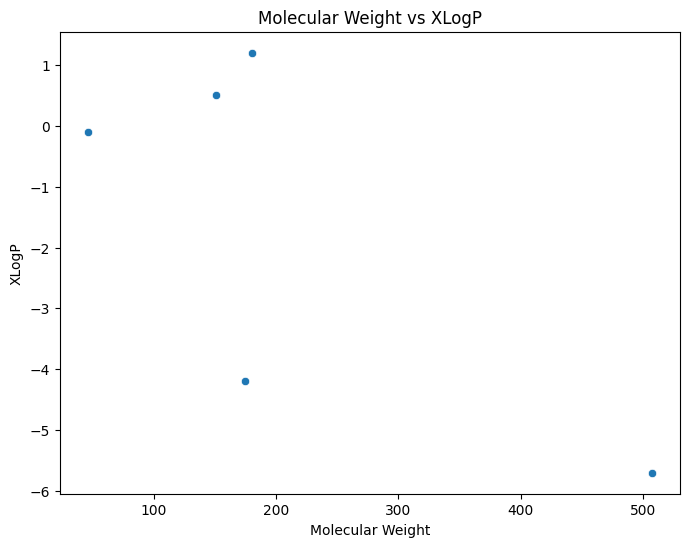

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Molecular Weight vs XLogP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MolecularWeight', y='XLogP', data=data)
plt.title('Molecular Weight vs XLogP')
plt.xlabel('Molecular Weight')
plt.ylabel('XLogP')
plt.show()

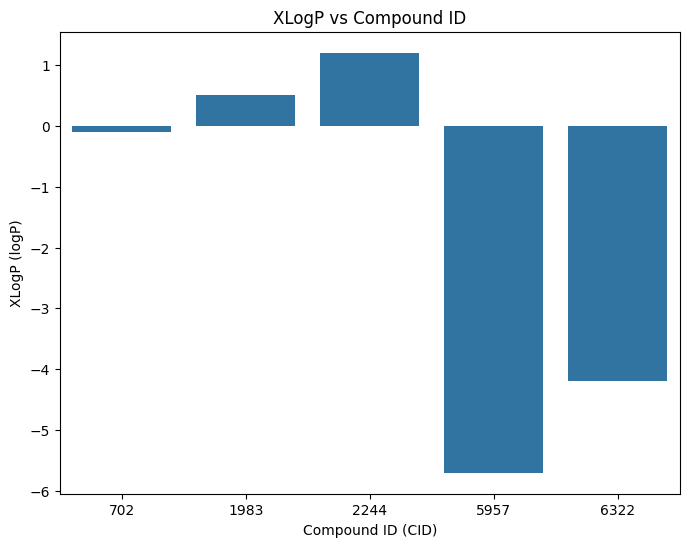

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x='CID', y='XLogP', data=data)
plt.title('XLogP vs Compound ID')
plt.xlabel('Compound ID (CID)')
plt.ylabel('XLogP (logP)')
plt.show()